In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
y = y*2 - 1

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

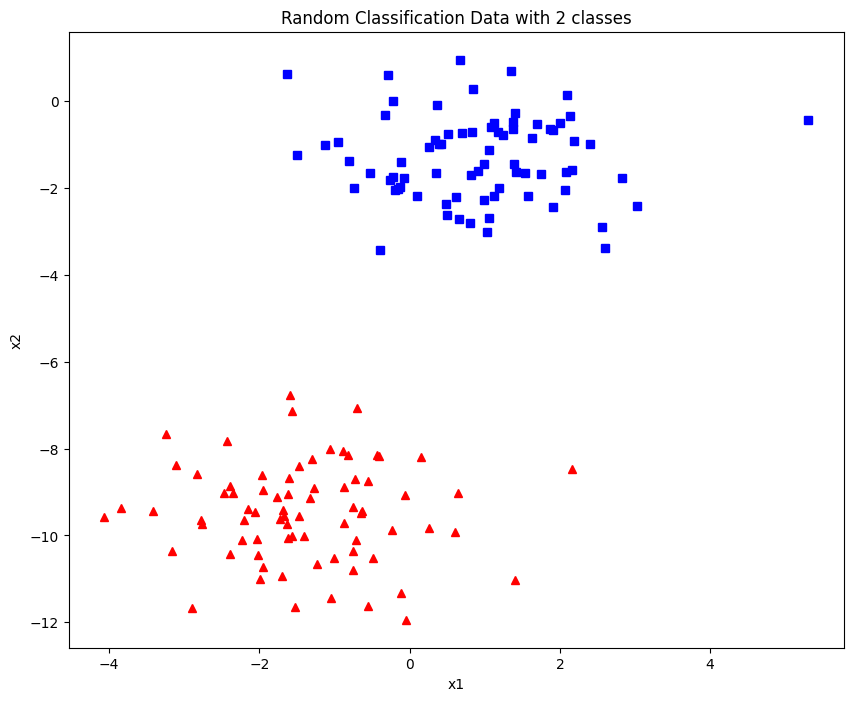

In [3]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Random Classification Data with 2 classes')

In [4]:
def sign(z):
        return 1.0 if (z > 0) else -1.0

In [5]:
def PLA(X, y, iterations):
    '''
    Implements the Perceptron Learning Algorithm : h(x) = sign(W_transpose.X)
    '''
    # X --> Input vector
    # y --> target vector
    # iterations --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    N, d = X.shape
    
    # Initializing weights to zeros, including bias term with x0 = 1
    W = np.zeros((d+1,1))
    
    # Empty list to store how many examples were misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for iteration in range(iterations):
        
        # to store misclassified point
        n_miss = 0
        
        # looping for every data point
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis
            y_hat = sign(np.dot(W.T, x_i))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                W += x_i * y[idx]
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
    
    return W, n_miss_list

In [6]:
def plot_decision_boundary(X, W):
    
    '''
    Plots the final hypothesis g
    '''
    
    # X --> Input vector
    # W --> weights
    
    # The Line is y=mx+c
    # So, Equate mx+c = W0.X0 + W1.X1 + W2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -W[1]/W[2]
    c = -W[0]/W[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

In [7]:
W, miss_l = PLA(X, y, 100)

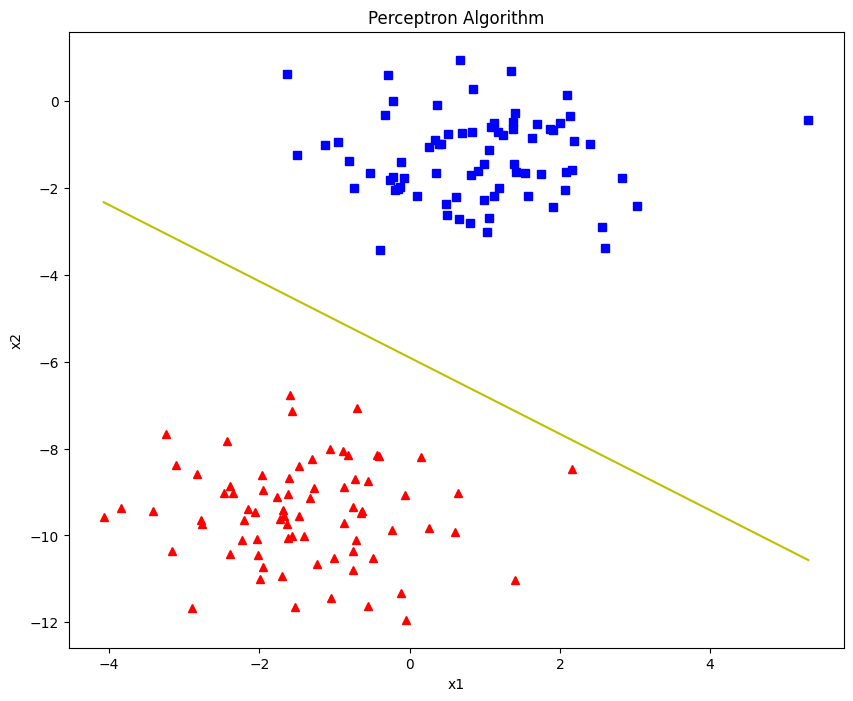

In [8]:
plot_decision_boundary(X, W)